# 01 Importing libraries

In [127]:
# Importing libraries with 3 new libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Importing data

In [129]:
# Defining a path for importing/exporting
path = R'/Users/peterguan/Instacart Basket Analysis'

In [130]:
# Importing the 'customer_merged' pkl file
customer_merged = pd.read_pickle(r'/Users/peterguan/Instacart Basket Analysis/02 Data/Prepared Data/customer_merged.pkl')

In [131]:
# Checking the first 5 rows
customer_merged.head()

Unnamed: 0.1  Unnamed: 0_x  order_id  user_id  order_number  \
0             0             0   2539329        1             1   
1             0             0   2539329        1             1   
2             0             0   2539329        1             1   
3             0             0   2539329        1             1   
4             0             0   2539329        1             1   

   orders_day_of_week  order_hour_of_day  days_since_prior_order  product_id  \
0                   2                  8                     NaN         196   
1                   2                  8                     NaN       14084   
2                   2                  8                     NaN       12427   
3                   2                  8                     NaN       26088   
4                   2                  8                     NaN       26405   

   add_to_cart_order  ...  first_name  last_name  gender    state  age  \
0                  1  ...       Linda     Nguyen  Female  Alabama   31   
1                  2  ...       Linda     Nguyen  Female  Alabama   31   
2                  3  ...       Linda     Nguyen  Female  Alabama   31   
3                  4  ...       Linda     Nguyen  Female  Alabama   31   
4                  5  ...       Linda     Nguyen  Female  Alabama   31   

   date_joined number_of_dependents martial_status income customer_inner_merge  
0    2/17/2019                    3        married  40423                 both  
1    2/17/2019                    3        married  40423                 both  
2    2/17/2019                    3        married  40423                 both  
3    2/17/2019                    3        married  40423                 both  
4    2/17/2019                    3        married  40423                 both  

[5 rows x 40 columns]

In [132]:
# Checking the dimensions of the dataframe
customer_merged.shape

(30629992, 40)

# 03 Creating Visualizations

### #3: You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
#### -In a markdown cell beneath your histogram, describe what the histogram demonstrates.

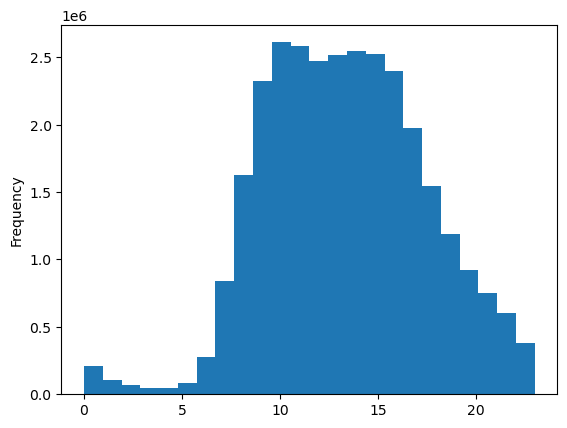

In [135]:
# Creating a HISTOGRAM of the 'order_hour_of_day' column
hist = customer_merged['order_hour_of_day'].plot.hist(bins = 24)

#### - This histogram shows the peak order hours of the day.

### #4: The marketing team is curious about the distribution of orders among customers in terms of loyalty. 
#### - Create a bar chart from the “loyalty_flag” column.

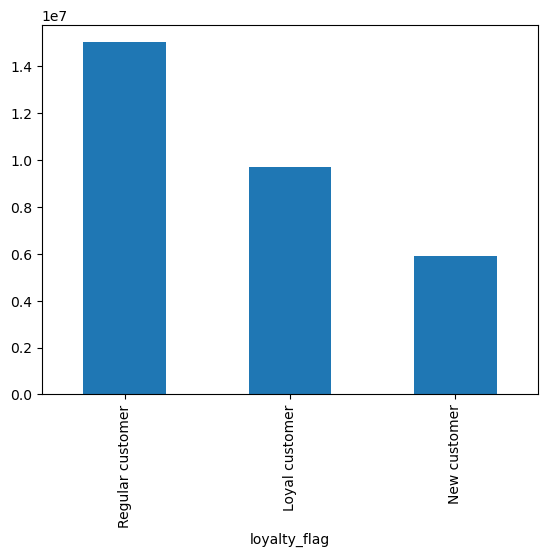

In [138]:
# Creating a bar chart with the 'loyalty_flag' column
bar = customer_merged['loyalty_flag'].value_counts().plot.bar()

### 5: Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [140]:
# Setting the 'seed' as (4) and creating a new list called 'dev' that stores your BOOLEAN values, 
# OUTPUTS true or false depending on the value being <= to 0.7
np.random.seed(4)
dev = np.random.rand(len(customer_merged)) <= 0.7

In [141]:
# Running the 'dev' list
dev

array([False,  True, False, ...,  True,  True, False])

In [142]:
# Storing 70% of the sample in 'big'
big = customer_merged[dev]

In [143]:
# Storing 30% of the sample in 'small'
small = customer_merged[~dev]

In [144]:
# Using the LEN function to find the length of the dataframe
len(customer_merged)

30629992

In [145]:
# Adding the two dataframes, big and small, to check if the number of rows match
len(big) + len(small)

30629992

In [146]:
# Creating a new dataframe, 'customer_2', that only contains the 2 columns, 'order_hour_of_day' and 'prices'
customer_2 = small[['order_hour_of_day','prices']]

In [147]:
# Checking the 'customer_2' if it shows the 2 columns and 30% of the rows
customer_2

order_hour_of_day  prices
0                         8     9.0
2                         8     4.4
3                         8     4.7
6                         7     3.0
10                        7     4.0
...                     ...     ...
30629971                 12     1.3
30629973                 12     6.2
30629976                 12     3.7
30629988                 12     5.9
30629991                 12     1.7

[9188064 rows x 2 columns]

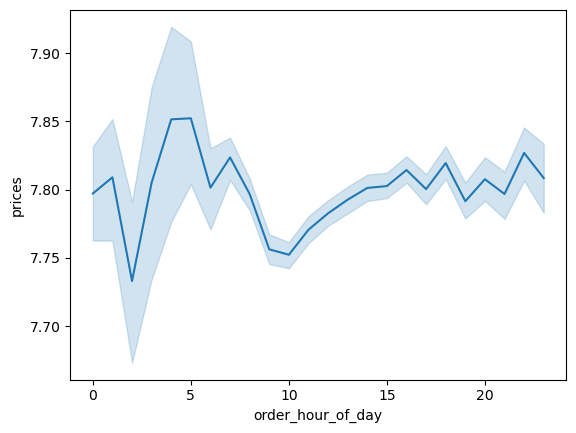

In [148]:
# Creating a line chart
line = sns.lineplot(data = customer_2, x = 'order_hour_of_day',y = 'prices')

#### - There is a difference in expenditure depending on the hour of the day. Prices peak at the 5th hour of the day and dips at the 2nd hour of the day.

### #6 Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
#### - In a markdown cell beneath your line chart, describe what the line chart shows.

In [151]:
# Creating a new dataframe, 'customer_3', that only contains the 2 columns, 'age' and 'number_of_dependents'
customer_3 = small[['age','number_of_dependents']]

In [152]:
# Checking the 'customer_3' if it shows the 2 columns and 30% of the rows
customer_3

age  number_of_dependents
0          31                     3
2          31                     3
3          31                     3
6          31                     3
10         31                     3
...       ...                   ...
30629971   74                     3
30629973   74                     3
30629976   74                     3
30629988   74                     3
30629991   74                     3

[9188064 rows x 2 columns]

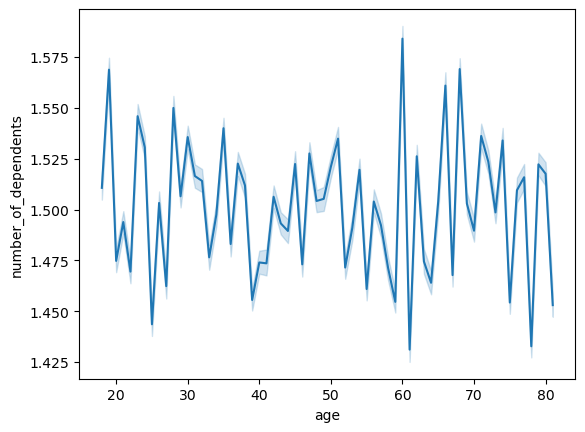

In [153]:
# Creating a line chart
line_2 = sns.lineplot(data = customer_3, x = 'age',y = 'number_of_dependents')

#### - This line chart shows that the number of dependents flucuates as the age progresses.

### #7: You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
#### - In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

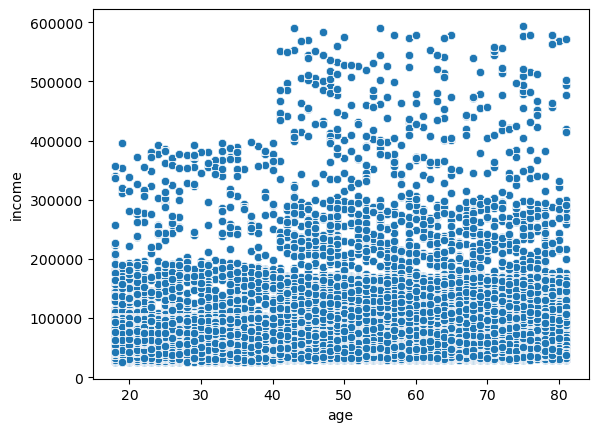

In [156]:
# Creating a scatterplot of the 'prices' column (SEABORN library: SNS)
scatterplot = sns.scatterplot(x = 'age', y = 'income',data = customer_merged)

# 04 Exporting the visualizations

In [158]:
# Exporting and saving the HISTOGRAM as an image file
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_customer_dow.png'))

In [159]:
# Saving and exporting the BAR chart as an image file using 'figure.savefig' 
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_dow.png'))

In [160]:
# Exporting and saving the LINE chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_customer_dow.png'))

In [161]:
# Exporting and saving the SECOND LINE chart
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_2_customer_dow.png'))

In [162]:
# Exporting and saving the SCATTERPLOT chart
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_customer_dow.png'))